# Refinement of magnetite phase

In [1]:
%matplotlib inline
import G2script as G2
import matplotlib.pyplot as plt
import numpy as np

setting up GSASIIscriptable from /users/edgar1993a/work/g2home
GSAS-II binary directory: /users/edgar1993a/work/g2home/bindist
7 values read from config file /users/edgar1993a/work/g2home/config.py


#### Create the project

In [2]:
PROJECT_NAME = 'gsas_magnetite.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx


#### Import the XRPD data as a histogram

In [3]:
hist = gpx.add_powder_histogram(
    datafile='magnetit.prn', 
    iparams='cuka.instprm',
)

/home/edgar1993a/work/pyobjcryst/magnetit.prn
Skipping header line     5.000       166

Skipping header line     5.020       176

Skipping header line     5.040       166

GSAS powder data scan error: no BANK records
/home/edgar1993a/work/pyobjcryst/magnetit.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^


#### Import the magnetite phase from its .cif file

In [4]:
ph_magnetite = gpx.add_phase(
    phasename='magnetite',
    phasefile="Fe3O4_3.cif",
    histograms=[hist],
)

/home/edgar1993a/work/pyobjcryst/Fe3O4_3.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx


#### Refine background automatically

In [5]:
hist.calc_autobkg()
hist.set_refinements({"Limits" : {"low"  : 15}, "Background" : {"no. coeffs" : 6, "refine" : True}})
hist.fit_fixed_points()

Using default value of 6.55 for pybaselines.whittaker.[i]arpls background computation
Number of function calls: 3 Number of observations: 6751 Number of parameters: 6
fitpeak time =    0.016s,    0.016s/cycle
Rwp =   21.52%, chi**2 =       126091, reduced chi**2 =  18.69
Background coefficients for chebyschev-1 function
value:     21.99382    -2.40084     8.80449    -1.74824     1.50723    -1.74735
esd  :      0.06421     0.11262     0.10103     0.09914     0.08629     0.08584
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx


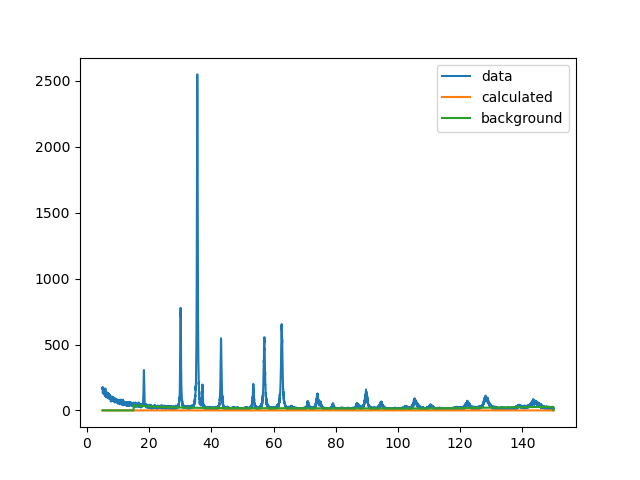

In [6]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()

#### First project refinement to include the peaks of the phase

In [7]:
gpx.do_refinements()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx
 Hessian Levenberg-Marquardt SVD refinement on 7 variables:
initial chi^2 2.3373e+05 with 6751 obs.
Cycle 0: 0.13s, Chi**2: 1.5058e+05 for 6751 obs., Lambda: 0,  Delta: 0.356, SVD=0
Cycle 1: 0.12s, Chi**2: 1.5058e+05 for 6751 obs., Lambda: 0,  Delta: 1.14e-09, SVD=0
converged
Maximum shift/esd = 0.855 for all cycles
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_magnetite.bak26.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_magnetite.lst
 ***** Refinement successful *****


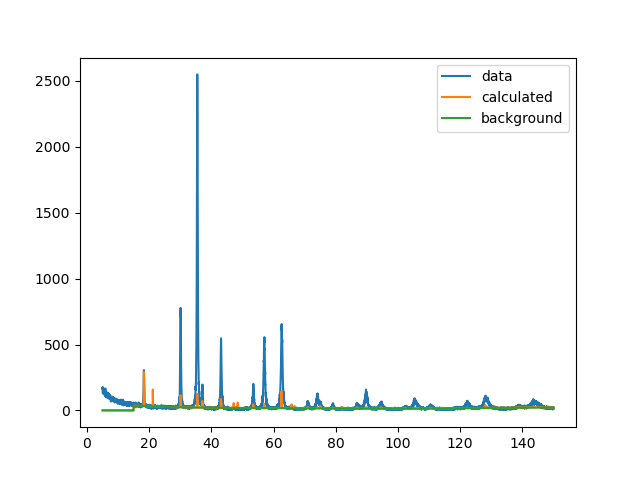

In [8]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()

#### Refine cell parameters, instrument parameters and crystallite size sequentially

In [9]:
ref_list = [
    {"set" : {"Cell" : False, "LeBail" : True}},
    {"set" : {"Instrument Parameters" : ["U", "V", "W", "X", "Y", "Z"]}},
    {"set" : {"Sample Parameters" : ["DisplaceX"]}},
    {"set" : {"Scale" : True, "Size" : {"refine" : True}}},
    {"set" : {"HStrain" : True}},
]

gpx.do_refinements(ref_list)

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx
 Hessian Levenberg-Marquardt SVD refinement on 7 variables:
initial chi^2 1.5058e+05 with 6751 obs.
divergence: chi^2 1.9964e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-03
divergence: chi^2 1.9964e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-02
divergence: chi^2 1.9964e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-01
divergence: chi^2 1.9964e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+00
divergence: chi^2 1.9964e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+01
divergence: chi^2 1.9964e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+02
ouch #4 stuck: chisq-new 1.996e+05 > chisq0 1.506e+05 with lambda 1e+02
Maximum shift/esd = 0.000 for all cycles
Note highly correlated parameters:
     :0:Back;0 and :0:Back;2 (@71.05%)
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_magnetite.bak2

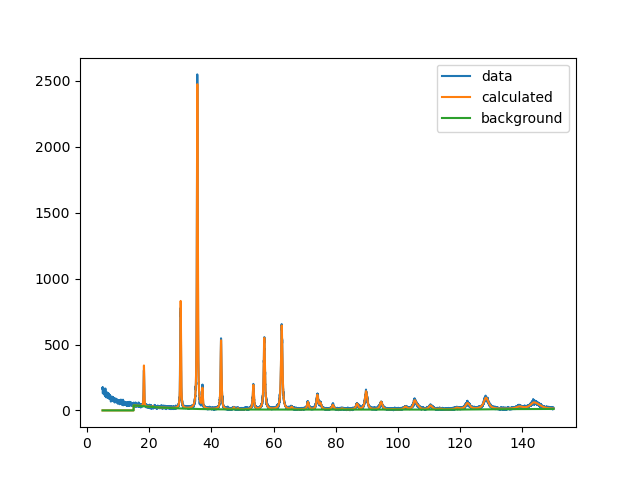

In [10]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()

#### Cyclic refinement

In [11]:
# gpx.set_Controls('sequential',gpx.histograms())
# gpx.set_Controls('cycles',10)

#### We can refine the powder diffraction data without the CIF file by adding the peaks manually

In [12]:
PROJECT_NAME = 'gsas_magnetite.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()
hist = gpx.add_powder_histogram(
    datafile='magnetit.prn', 
    iparams='cuka.instprm',
)
hist.set_refinements({'Limits': [5.,65.],
                      'Background': {"no. coeffs": 6,'type': 'chebyschev-1', 'refine': True},
                      "Instrument Parameters" : ["U", "V", "W", "X", "Y", "Z"],
})

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_magnetite.gpx
/home/edgar1993a/work/pyobjcryst/magnetit.prn
Skipping header line     5.000       166

Skipping header line     5.020       176

Skipping header line     5.040       166

GSAS powder data scan error: no BANK records
/home/edgar1993a/work/pyobjcryst/magnetit.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^


In [13]:
hist.add_peak(area=100, ttheta=18.28)
hist.add_peak(area=1000, ttheta=30.02)
hist.add_peak(area=1000, ttheta=35.48)
hist.add_peak(area=100, ttheta=37.10)
hist.add_peak(area=100, ttheta=43.14)
hist.add_peak(area=100, ttheta=53.59)
hist.add_peak(area=100, ttheta=57.13)
hist.add_peak(area=100, ttheta=62.60)
hist.refine_peaks()

Number of function calls: 87 Number of observations: 3001 Number of parameters: 20
fitpeak time =    0.826s,    0.019s/cycle
Rwp =   30.43%, chi**2 =      20094.9, reduced chi**2 =   6.74
Background coefficients for chebyschev-1 function
value:     29.85156   -53.34193    21.12059   -16.46702     4.67370    -3.26470
esd  :      0.61313     1.05825     0.86612     0.68720     0.53770     0.48011
Instrument Parameters:
names :I(L2)/I(L1)      U           V           W           X           Y           Z          SH/L    
values:    0.500000 -233.785654 -386.309436 -178.722781  -16.895636  230.641218  -30.197313    0.002000
esds  :              437.808561  330.309904   59.337244  128.890712   41.717705  122.681963            
Peak coefficients:
                pos       esd       int       esd       sig       esd       gam       esd        bins    
 Peak1   :  18.28000                76.6   68186.9  -246.928             -10.202               nan
 Peak2   :  30.02000             15465.7   

/users/edgar1993a/work/g2home/GSASIIpwd.py:926: RuntimeWarning: invalid value encountered in log
  gamFW = lambda s,g: np.exp(np.log(s**5+2.69269*s**4*g+2.42843*s**3*g**2+4.47163*s**2*g**3+0.07842*s*g**4+g**5)/5.)


({'Back;0': 0.6131275480672276,
  'Back;1': 1.0582548160311638,
  'Back;2': 0.8661236318391649,
  'Back;3': 0.6872048215416047,
  'Back;4': 0.5377020784767771,
  'Back;5': 0.480109431748418,
  'U': 437.8085613428532,
  'V': 330.30990404874484,
  'W': 59.337244009452526,
  'X': 128.8907120583438,
  'Y': 41.71770466707362,
  'Z': 122.68196272462055,
  'int0': 68186.8629449074,
  'int1': 428.52559714288225,
  'int2': 861.4688210111885,
  'int3': 268.48710922588015,
  'int4': 458.28308882903224,
  'int5': 345.1843471884829,
  'int6': 622.6342965011975,
  'int7': 956.6836728960016},
 (array([ 2.98515610e+01, -5.33419252e+01,  2.11205873e+01, -1.64670194e+01,
          4.67369612e+00, -3.26470354e+00, -2.33785654e+02, -3.86309436e+02,
         -1.78722781e+02, -1.68956360e+01,  2.30641218e+02, -3.01973132e+01,
          7.65877405e+01,  1.54656771e+04,  7.06793319e+04,  4.14645809e+03,
          1.72553136e+04,  7.34897907e+03,  2.31004095e+04,  3.77289196e+04]),
  array([[ 5.57671694e-02,  

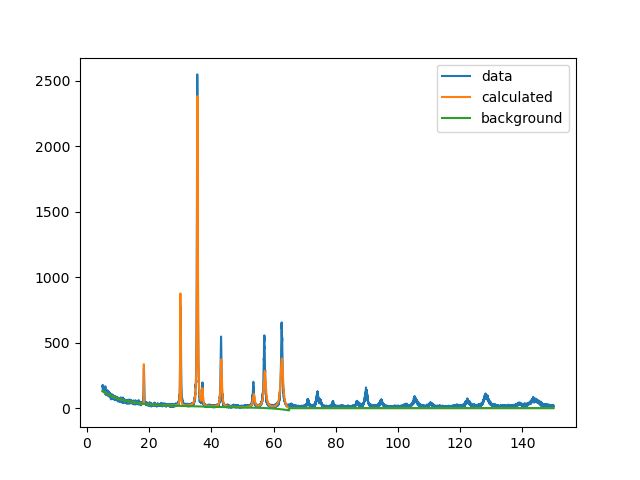

In [14]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()

#### We flag the parameters of the peak we want to refine

In [15]:
hist.set_peakFlags(
    peaklist=None, #apply to all peaks
    area=True, #Area
    pos=True, # x-position
    sig=True, #Gaussian width
    gam=True, #Lorentzian width
)

In [16]:
hist.refine_peaks()

Number of function calls: 22 Number of observations: 3001 Number of parameters: 44
fitpeak time =    0.199s,    0.018s/cycle
Rwp =   18.02%, chi**2 =      7045.15, reduced chi**2 =   2.38
**** Refinement failed - singular matrix ****
Removing parameter: Y
Number of function calls: 6 Number of observations: 3001 Number of parameters: 43
fitpeak time =    0.066s,    0.022s/cycle
Rwp =   18.02%, chi**2 =      7044.26, reduced chi**2 =   2.38
**** Refinement failed - singular matrix ****
Removing parameter: Z
Number of function calls: 7 Number of observations: 3001 Number of parameters: 42
fitpeak time =    0.076s,    0.025s/cycle
Rwp =   18.01%, chi**2 =      7040.04, reduced chi**2 =   2.38
**** Refinement failed - singular matrix ****
Removing parameter: X
Number of function calls: 11 Number of observations: 3001 Number of parameters: 41
fitpeak time =    0.063s,    0.013s/cycle
Rwp =   18.01%, chi**2 =       7038.1, reduced chi**2 =   2.38
**** Refinement failed - singular matrix ****


({'Back;0': 0.2936349163640601,
  'Back;1': 0.5245898753572285,
  'Back;2': 0.4447121187352691,
  'Back;3': 0.4045097034137708,
  'Back;4': 0.32859955175647776,
  'Back;5': 0.29230445835454194,
  'pos0': 36.914424283972124,
  'int0': 15422232.22724322,
  'sig0': 8640.248257013855,
  'gam0': 1812.9997467357096,
  'pos1': 0.0022765678761850314,
  'int1': 294.94180879235836,
  'sig1': 4.680660786892049,
  'gam1': 0.8962350415627516,
  'pos2': 0.001310624259054327,
  'int2': 522.1339109691493,
  'sig2': 2.8624664934505017,
  'gam2': 0.48719447334633803,
  'pos3': 0.005773928785471677,
  'int3': 176.34100107886144,
  'sig3': 13.334687040457979,
  'gam3': 2.8270716035035495,
  'pos4': 0.0031593956709674775,
  'int4': 277.2266528391612,
  'sig4': 7.805801157667249,
  'gam4': 1.2740519882015895,
  'pos5': 0.006593406114513334,
  'int5': 209.20651223048986,
  'sig5': 18.898052782291966,
  'gam5': 3.0731144941500714,
  'pos6': 0.003670781831838709,
  'int6': 348.0794885652674,
  'sig6': 10.59882

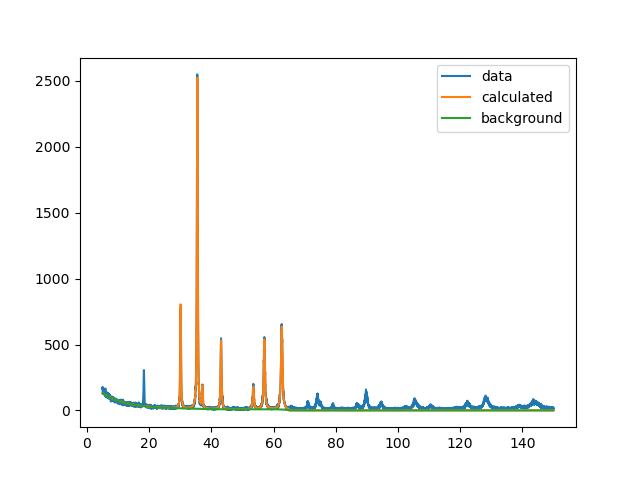

In [17]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()